"""
This script is used to plot the Global mean surface air temperature (GMSAT) from observation and multimodel simulation.
"""

## import observation data

In [2]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from pathlib import Path
import glob
# %%
# define function
import src.SAT_function as data_process
import src.Data_Preprocess as preprocess

In [3]:
# subplot a: global mean temperature anomalies during 1850-2022 HadCRUT5
input_observation = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Supp_Figure1/'

tas_HadCRUT_annual = xr.open_dataset(input_observation + 'tas_HadCRUT5_annual_anomalies.nc')

In [4]:
tas_HadCRUT_annual

<xarray.Dataset> Size: 22MB
Dimensions:  (lon: 180, lat: 90, year: 173)
Coordinates:
  * lon      (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat      (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * year     (year) int64 1kB 1850 1851 1852 1853 1854 ... 2019 2020 2021 2022
Data variables:
    tas      (year, lat, lon) float64 22MB ...

In [5]:
# tas_HadCRUT_annual = tas_HadCRUT_annual.rename({'__xarray_dataarray_variable__': 'tas_HadCRUT5'})

In [6]:
tas_HadCRUT_annual_1850_2022 = tas_HadCRUT_annual.sel(year=slice('1993', '2022')).tas

In [7]:
tas_HadCRUT5_annual_ano = tas_HadCRUT_annual_1850_2022.mean(dim=['year'])

In [8]:
tas_HadCRUT5_annual_ano.min().values, tas_HadCRUT5_annual_ano.max().values

(array(-0.39887073), array(2.23875029))

## Input the multimodel mean GMST data

### Subplot b: plot the multimodel ensemble mean timeseries

In [9]:
input_model = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Supp_Figure1/'

ACCESS_GMSAT_annual_ENS     = xr.open_dataset(input_model + 'GMSAT_ACCESS_annual_timeseries_ENS.nc')
CanESM_GMSAT_annual_ENS     = xr.open_dataset(input_model + 'GMSAT_CanESM5_annual_timeseries_ENS.nc')
EC_Earth_GMSAT_annual_ENS   = xr.open_dataset(input_model + 'GMSAT_EC_Earth_annual_timeseries_ENS.nc')
IPSL_GMSAT_annual_ENS   = xr.open_dataset(input_model + 'GMSAT_IPSL_CM6A_annual_timeseries_ENS.nc')
MIROC_GMSAT_annual_ENS  = xr.open_dataset(input_model + 'GMSAT_MIROC6_annual_timeseries_ENS.nc')
MPI_GMSAT_annual_ENS    = xr.open_dataset(input_model + 'GMSAT_MPI_ESM_annual_timeseries_ENS.nc')
MMEM_GMSAT_annual_ENS   = xr.open_dataset(input_model + 'GMSAT_SMILEs_ENS_annual_timeseries.nc')

In [10]:
MMEM_GMSAT_annual_ENS_check = xr.open_dataset(input_model + 'GMSAT_SMILEs_ENS_annual_timeseries_obtained_basedOn_ModelENS.nc')

In [11]:
MPI_GMSAT_annual_ENS['tas'].min().values, MPI_GMSAT_annual_ENS['tas'].max().values

(array(-0.68151586), array(0.8175886))

In [12]:
IPSL_GMSAT_annual_ENS

<xarray.Dataset> Size: 3kB
Dimensions:  (year: 173)
Coordinates:
  * year     (year) int64 1kB 1850 1851 1852 1853 1854 ... 2019 2020 2021 2022
    height   float64 8B ...
Data variables:
    tas      (year) float64 1kB ...

### Subplot c: plotting the alpha and beta coefficients spatial pattern

In [13]:
# load the data
# MMEM GMSAT annual regression coefficient
dir_path = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Supp_Figure1/'

beta_MMEM_HadCRUT5_annual = xr.open_dataset(dir_path + 'HadCRUT_slope_Beta_coefficients.nc')
alpha_MMEM_HadCRUT5_annual = xr.open_dataset(dir_path + 'HadCRUT_intercept_Alpha_constant.nc')

In [14]:
beta_MMEM_HadCRUT5_annual = beta_MMEM_HadCRUT5_annual.rename({'__xarray_dataarray_variable__': 'beta_MMEM_HadCRUT5'})
alpha_MMEM_HadCRUT5_annual = alpha_MMEM_HadCRUT5_annual.rename({'__xarray_dataarray_variable__': 'alpha_MMEM_HadCRUT5'})

In [15]:
beta_MMEM_HadCRUT5_annual['beta_MMEM_HadCRUT5'].min().values, beta_MMEM_HadCRUT5_annual['beta_MMEM_HadCRUT5'].max().values

(array(-0.33009527), array(2.59512534))

In [16]:
alpha_MMEM_HadCRUT5_annual['alpha_MMEM_HadCRUT5'].min().values, alpha_MMEM_HadCRUT5_annual['alpha_MMEM_HadCRUT5'].max().values

(array(-0.5302725), array(0.64535241))

### Subplot d: the reconstructed y mean and the y residual from the raw data

In [17]:
dir_const = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Supp_Figure1/data/'

GSAT_estimate_forced = xr.open_dataset(dir_const + 'GSAT_HadCRUT5_Forced_anomalies_1850_2022.nc')
GSAT_estimate_internal = xr.open_dataset(dir_const + 'GSAT_HadCRUT5_Internal_Variability_anomalies_1850_2022.nc')

In [18]:
GSAT_estimate_forced = GSAT_estimate_forced.rename({'__xarray_dataarray_variable__': 'GSAT_HadCRUT5_Forced'})
GSAT_estimate_internal = GSAT_estimate_internal.rename({'__xarray_dataarray_variable__': 'GSAT_HadCRUT5_Internal'})

In [19]:
# Calculate the last 30years mean
GSAT_estimate_forced_1993_2022 = GSAT_estimate_forced.sel(year=slice('1993', '2022')).GSAT_HadCRUT5_Forced

In [20]:
GSAT_estimate_forced_mean = GSAT_estimate_forced_1993_2022.mean(dim=['year'])
# GSAT_estimate_internal_mean = GSAT_estimate_internal['GSAT_HadCRUT5_Internal'].mean(dim=['year'])

In [21]:
GSAT_estimate_forced_mean.min().values, GSAT_estimate_forced_mean.max().values

(array(-0.38987485), array(2.24437328))

## Plotting 

In [22]:
import svgwrite
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerLine2D
from matplotlib.legend import Legend
import matplotlib.lines as Line2D

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm, ListedColormap

In [23]:
#Plotting
# setting the parameters for the figure
plt.rcParams['figure.figsize'] = (8, 10)
plt.rcParams['font.size'] = 16
# plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.right'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['savefig.transparent'] = True # save the figure with a transparent background

In [24]:
# Setting the range of the x-axis
x = np.arange(1850, 2023, 1)

In [25]:
obs_name = ["HadCRUT5"]
model_names = ["CanESM5(50)", "IPSL-CM6A-LR(32)", "EC-Earth3(21)", "ACCESS-ESM1.5(40)", "MPI-ESM1.2-LR(50)","MIROC6(50)"]

RGB_dict = {'CanESM5(50)':np.array([50, 34, 136])/255., 
            'IPSL-CM6A-LR(32)':np.array([68, 170, 152])/255., 
            'EC-Earth3(21)':np.array([221, 204, 118])/255., 
            'ACCESS-ESM1.5(40)':np.array([204, 101, 119])/255.,
            'MPI-ESM1.2-LR(50)':np.array([170, 67, 153])/255., 
            'MIROC6(50)':np.array([136, 33, 85])/255., 
            'MME':np.array([0, 0, 0])/255.}

In [26]:
c_obs = "orange"
c_obs_1 = "blue"
c_obs_2 = "green" #'darkred'

obs_color = {
    "MLOST": c_obs,
    "HadCRUT5": c_obs_1,
    "Berkeley": c_obs_2
}

for obs in obs_name:
    print(obs)
    obs_color[obs]
    print(obs_color[obs])
    
lw_obs = 1.5
lw_model = 2.5
xmin, xmax = 1850, 2022
ymin, ymax = -1.5, 2.0

HadCRUT5
blue


In [27]:
RGB_dict[model_names[0]],model_names[0]

(array([0.19607843, 0.13333333, 0.53333333]), 'CanESM5(50)')

### Plot the y (original SAT anomalies data spatial pattern)

In [28]:
# define the contourf plot function
def plot_data(data,lats,lons,levels=None, extend=None,cmap=None, title="", ax=None, show_xticks=False, show_yticks=False):
    if ax is None:
        fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()})
    
    # ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()], crs=ccrs.PlateCarree())
    # Add coastlines
    ax.coastlines(resolution='110m')
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,
                      colors='gray', alpha=0.5, linestyle='--', linewidth=0.5)

    # Disable labels on the top and right of the plot
    gl.top_labels = False
    gl.right_labels = False

    # Enable labels on the bottom and left of the plot
    gl.bottom_labels = show_xticks
    gl.left_labels = show_yticks
    gl.xformatter = cticker.LongitudeFormatter()
    gl.yformatter = cticker.LatitudeFormatter()
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}
    
    if show_xticks:
        gl.bottom_labels = True
    if show_yticks:
        gl.left_labels = True
    # Add filled contour plot
    cf = ax.contourf(lons, lats, data, levels=levels, extend=extend, cmap=cmap, transform=ccrs.PlateCarree())
    
    # Add title
    ax.set_title(title, loc='center', fontsize=18, pad=5.0)
    return cf

In [29]:
import matplotlib.pyplot as plt
import patchworklib as pw
import cartopy.util as cutil


<Figure size 100x100 with 0 Axes>

In [30]:
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.colors import BoundaryNorm
import cartopy.util as cutil
import seaborn as sns
import matplotlib.colors as mcolors
import palettable
#  cmap = mcolors.ListedColormap(palettable.scientific.diverging.Vik_20.mpl_colors)
cmap=mcolors.ListedColormap(palettable.cmocean.diverging.Balance_20.mpl_colors)

In [31]:
# Four subplots
"""
    subplot a: global mean temperature anomalies during 1850-2022 HadCRUT5; contourf plot
    subplot b: model simulated GSAT timeseries in each SMILEs and MMEM 1850-2022; x-y line plot
    subplot c: GSAT anomalies Beta and Alpha coefficients; contourf plot (from top to bottom: Beta, Alpha two subplots concatenated)
    subplot d: GSAT anomalies spatial pattern by construction, with the internal variability and forced component; contourf plot 
    (from top to bottom: forced component, internal variability two subplots concatenated)
"""

'\n    subplot a: global mean temperature anomalies during 1850-2022 HadCRUT5; contourf plot\n    subplot b: model simulated GSAT timeseries in each SMILEs and MMEM 1850-2022; x-y line plot\n    subplot c: GSAT anomalies Beta and Alpha coefficients; contourf plot (from top to bottom: Beta, Alpha two subplots concatenated)\n    subplot d: GSAT anomalies spatial pattern by construction, with the internal variability and forced component; contourf plot \n    (from top to bottom: forced component, internal variability two subplots concatenated)\n'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


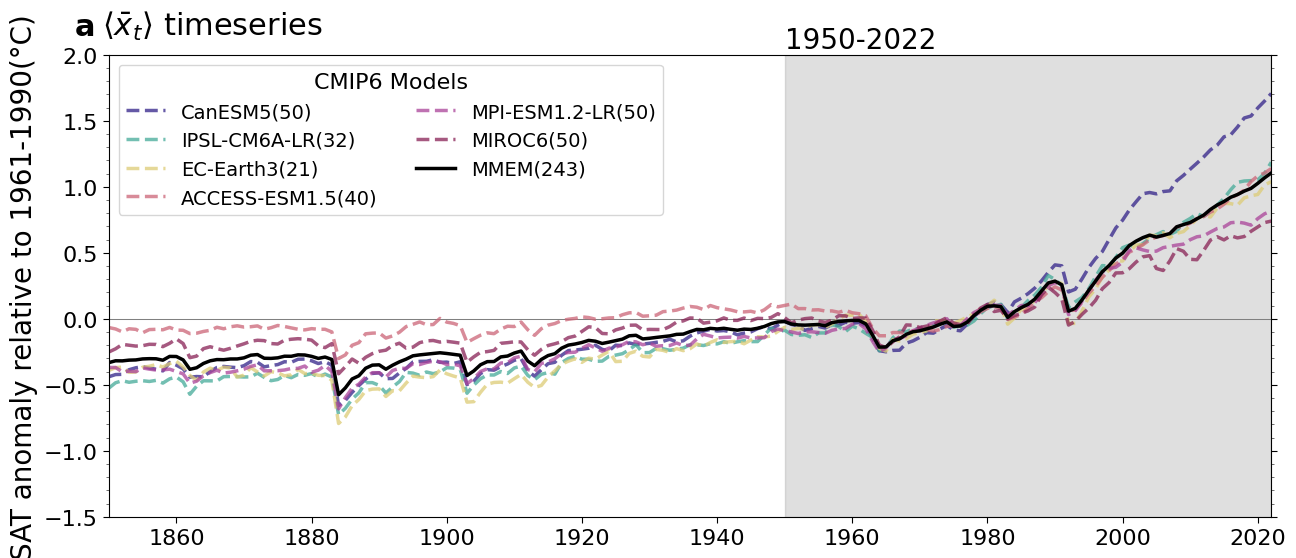

In [32]:
# subplot b: model simulated GSAT timeseries in each SMILEs and MMEM 1850-2022
# plot the GMSAT timeseries
fig2, ax2 = plt.subplots(figsize=(15, 6))
plt.plot([xmin,xmax],[0,0], color='grey', linestyle='-', linewidth=0.75)
# seven lines for six SMILEs and one MMEM
ax2.plot(x, CanESM_GMSAT_annual_ENS['tas'], color=RGB_dict[model_names[0]], label=model_names[0], linewidth=lw_model,
         linestyle= '--', alpha=0.75)
ax2.plot(x, IPSL_GMSAT_annual_ENS['tas'], color=RGB_dict[model_names[1]], label=model_names[1], linewidth=lw_model,
            linestyle= '--', alpha=0.75)
ax2.plot(x, EC_Earth_GMSAT_annual_ENS['tas'], color=RGB_dict[model_names[2]], label=model_names[2], linewidth=lw_model,
            linestyle= '--', alpha=0.75)
ax2.plot(x, ACCESS_GMSAT_annual_ENS['tas'], color=RGB_dict[model_names[3]], label=model_names[3], linewidth=lw_model,
            linestyle= '--', alpha=0.75)
ax2.plot(x, MPI_GMSAT_annual_ENS['tas'], color=RGB_dict[model_names[4]], label=model_names[4], linewidth=lw_model,
            linestyle= '--', alpha=0.75)
ax2.plot(x, MIROC_GMSAT_annual_ENS['tas'], color=RGB_dict[model_names[5]], label=model_names[5], linewidth=lw_model,
            linestyle= '--', alpha=0.75)
ax2.plot(x, MMEM_GMSAT_annual_ENS['tas'], color=RGB_dict['MME'], label='MMEM(243)', linewidth=lw_model)
# Add legend
plt.axvspan(1950, 2022, alpha=0.25, color='grey')
plt.text(1950, 2.05, '1950-2022', fontsize=20)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('SAT anomaly relative to 1961-1990(°C)', fontsize=20)
legend = plt.legend(loc='upper left', fontsize=14, ncol=2, title='CMIP6 Models', title_fontsize='16')
plt.text(1845, 2.15, 'a', fontsize=22, fontweight='bold', ha='left')
plt.text(1849, 2.15, r'$\langle \bar{x}_t \rangle$'+' timeseries', fontsize=22)
plt.savefig("Extended-Fig-1a.png", dpi=300, bbox_inches='tight')
plt.savefig("Extended-Fig-1a.eps", format='eps', dpi=300, bbox_inches='tight')

plt.show()

### Plot the third schematic diagram of the linear regression model to 
### extract the forced pattern with the alpha and betha scaling factors and the constant stands for intercepts

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


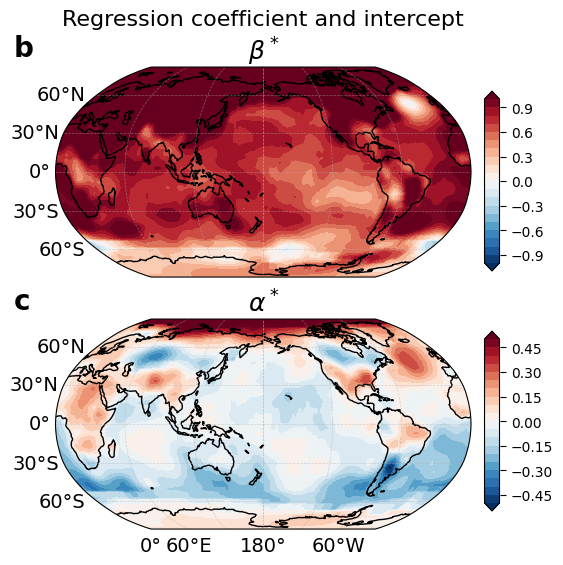

In [ ]:
fig3, ax3 = plt.subplots(figsize=(15, 6), nrows=2, ncols=1, subplot_kw={'projection': ccrs.Robinson(180)})
# subplot c: GSAT anomalies Beta and Alpha coefficients
# plot the GSAT anomalies Beta and Alpha coefficients
bounds = np.arange(-1.0,1.1,0.1)
bounds_alpha = np.arange(-0.5,0.55,0.05)

beta_anomalies = beta_MMEM_HadCRUT5_annual['beta_MMEM_HadCRUT5']
beta_anomalies_with_cyclic, lon_cyclic = cutil.add_cyclic_point(beta_anomalies, coord=beta_MMEM_HadCRUT5_annual['lon'])
contour_obj = plot_data(beta_anomalies_with_cyclic, beta_MMEM_HadCRUT5_annual['lat'], lon_cyclic, levels=bounds, 
                        extend='both', cmap='RdBu_r', title=r'$\beta^*$', ax=ax3[0], show_xticks=False, show_yticks=True)

alpha_anomalies = alpha_MMEM_HadCRUT5_annual['alpha_MMEM_HadCRUT5']
alpha_anomalies_with_cyclic, lon_cyclic = cutil.add_cyclic_point(alpha_anomalies, coord=alpha_MMEM_HadCRUT5_annual['lon'])
contour_obj1 = plot_data(alpha_anomalies_with_cyclic, alpha_MMEM_HadCRUT5_annual['lat'], lon_cyclic, levels=bounds_alpha,
                        extend='both', cmap='RdBu_r', title=r'$\alpha^*$', ax=ax3[1], show_xticks=True, show_yticks=True)

# add colorbar to the right of the plot
cbar_ax = fig3.add_axes([0.66, 0.54, 0.01, 0.3])
cbar = plt.colorbar(contour_obj, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=10)

cbar_ax1 = fig3.add_axes([0.66, 0.14, 0.01, 0.3])
cbar1 = plt.colorbar(contour_obj1, cax=cbar_ax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)

# add title to the plot
plt.text(-0.1, 1.05, 'b', fontsize=20,horizontalalignment='left', fontweight='bold', transform=ax3[0].transAxes)
plt.text(-0.1, 1.05, 'c', fontsize=20,horizontalalignment='left', fontweight='bold', transform=ax3[1].transAxes)

plt.text(0.5, 1.2, 'Regression coefficient and intercept', fontsize=16,horizontalalignment='center', transform=ax3[0].transAxes)

plt.savefig("Extended-Fig1-b-c.png", dpi=300, bbox_inches='tight')
plt.savefig("Extended-Fig1-b-c.eps", format='eps', dpi=300, bbox_inches='tight')

plt.show()


In [40]:
GSAT_estimate_forced_mean.min().values, GSAT_estimate_forced_mean.max().values

(array(-0.38987485), array(2.24437328))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


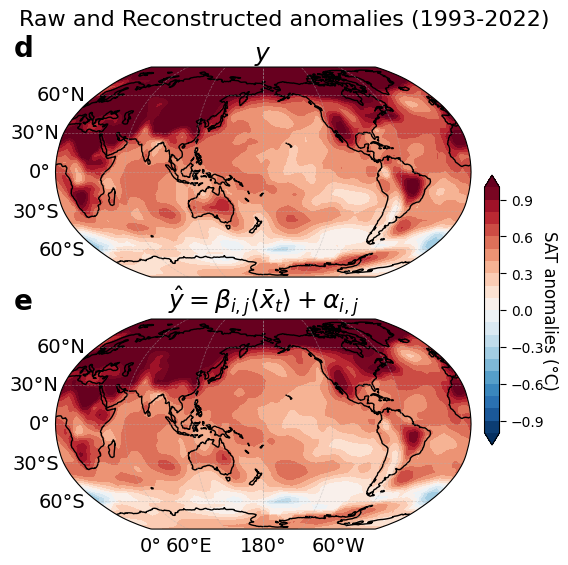

In [41]:
# subplot d: GSAT anomalies spatial pattern by construction, with the internal variability and forced component
# plot the GMSAT anomalies spatial pattern
fig4, ax4 = plt.subplots(figsize=(15, 6), nrows=2, ncols=1, subplot_kw={'projection': ccrs.Robinson(180)})

level_forced = np.arange(-1.0, 1.1, 0.1)

tas_HadCRUT5_annual_ano_with_cyclic, lon_cyclic = cutil.add_cyclic_point(tas_HadCRUT5_annual_ano, coord=tas_HadCRUT5_annual_ano['lon'])
contour_obj = plot_data(tas_HadCRUT5_annual_ano_with_cyclic, tas_HadCRUT5_annual_ano['lat'], lon_cyclic, levels=level_forced, 
                        extend='both', cmap='RdBu_r', 
                        title=r'$y$', ax=ax4[0], show_xticks=False, show_yticks=True)

GSAT_estimate_forced_mean_with_cyclic, lon_cyclic = cutil.add_cyclic_point(GSAT_estimate_forced_mean, coord=GSAT_estimate_forced_mean['lon'])
contour_obj1 = plot_data(GSAT_estimate_forced_mean_with_cyclic, GSAT_estimate_forced_mean['lat'], lon_cyclic, levels=level_forced, 
                        extend='both', cmap='RdBu_r', 
                        title=r'$\hat{y} = \beta_{i,j} \langle \bar{x}_t \rangle + \alpha_{i,j}$', ax=ax4[1], show_xticks=True, show_yticks=True)

# add colorbar to the right of the plot
cbar_ax = fig4.add_axes([0.66, 0.25, 0.01, 0.45])
cbar = plt.colorbar(contour_obj, cax=cbar_ax, orientation='vertical')
cbar.set_label('SAT anomalies (°C)', fontsize=12, labelpad=10, rotation=270)
cbar.ax.tick_params(labelsize=10)
# add title to the plot

plt.text(-0.1, 1.05, 'd',fontsize=20, fontweight='bold', horizontalalignment='left',transform=ax4[0].transAxes)
plt.text(-0.1, 1.05, 'e',fontsize=20, fontweight='bold', horizontalalignment='left',transform=ax4[1].transAxes)
plt.text(0.55, 1.2, 'Raw and Reconstructed anomalies (1993-2022)', horizontalalignment='center',
         fontsize=16, transform=ax4[0].transAxes)

plt.savefig("Extended-Fig1-d-e-GSAT-annual-anomalies-1993-2022.png", dpi=300, bbox_inches='tight')
plt.savefig("Extended-Fig1-d-e-GSAT-annual-anomalies-1993-2022.eps", format='eps', dpi=300, bbox_inches='tight')

plt.show()